In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, spectrogram
%matplotlib notebook

### STFT

In [8]:
_, _, fft = stft(sig, window='boxcar', noverlap=4, nperseg=8,boundary=None)

NameError: name 'sig' is not defined

In [197]:
fft

array([[ 3.125     +0.j        ,  2.875     +0.j        ,
         3.75      +0.j        ],
       [ 0.21338835-0.24371843j, -0.1982233 -0.21966991j,
        -0.76516504+0.10983496j],
       [-0.75      +0.625j     , -0.125     +1.j        ,
         1.125     +0.875j     ],
       [ 0.03661165-0.99371843j, -0.5517767 +1.28033009j,
        -0.23483496-0.64016504j],
       [-0.125     +0.j        , -0.125     +0.j        ,
         0.        +0.j        ]])

<IPython.core.display.Javascript object>


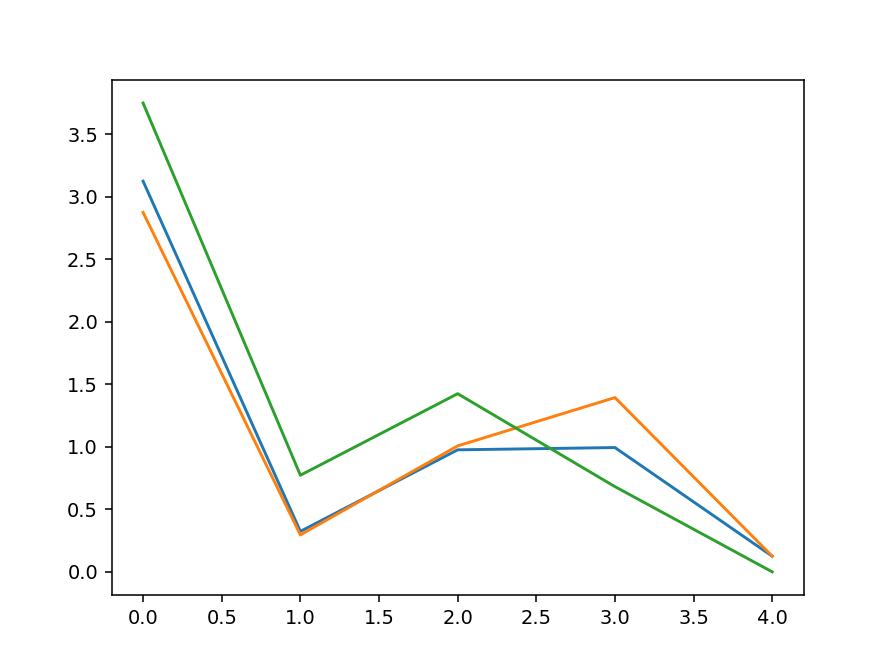

In [198]:
plt.plot(np.abs(fft));

In [205]:
_, sig2=istft(fft, window='boxcar', noverlap=4, nperseg=8,boundary=None)

In [206]:
sig2

array([2.00000000e+00, 4.00000000e+00, 3.00000000e+00, 6.00000000e+00,
       1.00000000e+00, 5.55111512e-17, 6.00000000e+00, 3.00000000e+00,
       4.00000000e+00, 2.00000000e+00, 0.00000000e+00, 7.00000000e+00,
       8.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00])

In [207]:
sig

array([2, 4, 3, 6, 1, 0, 6, 3, 4, 2, 0, 7, 8, 2, 3, 4])

In [208]:
sig-sig2

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.55111512e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

## spectrogram

In [2]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

<IPython.core.display.Javascript object>


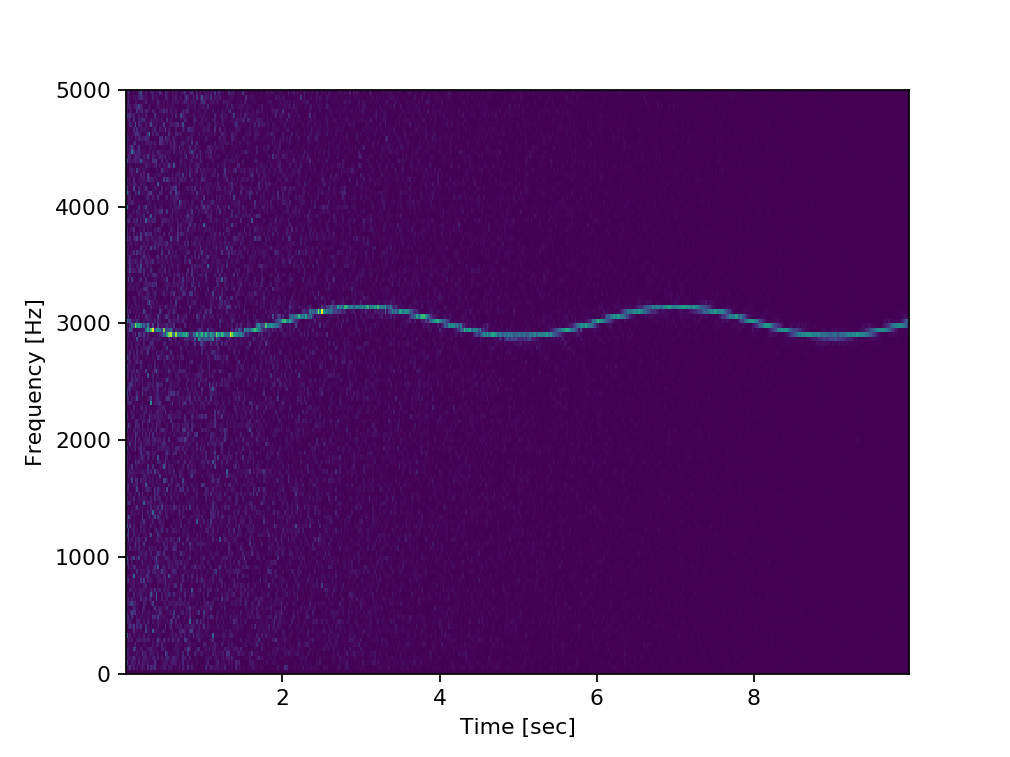

In [10]:
f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<IPython.core.display.Javascript object>


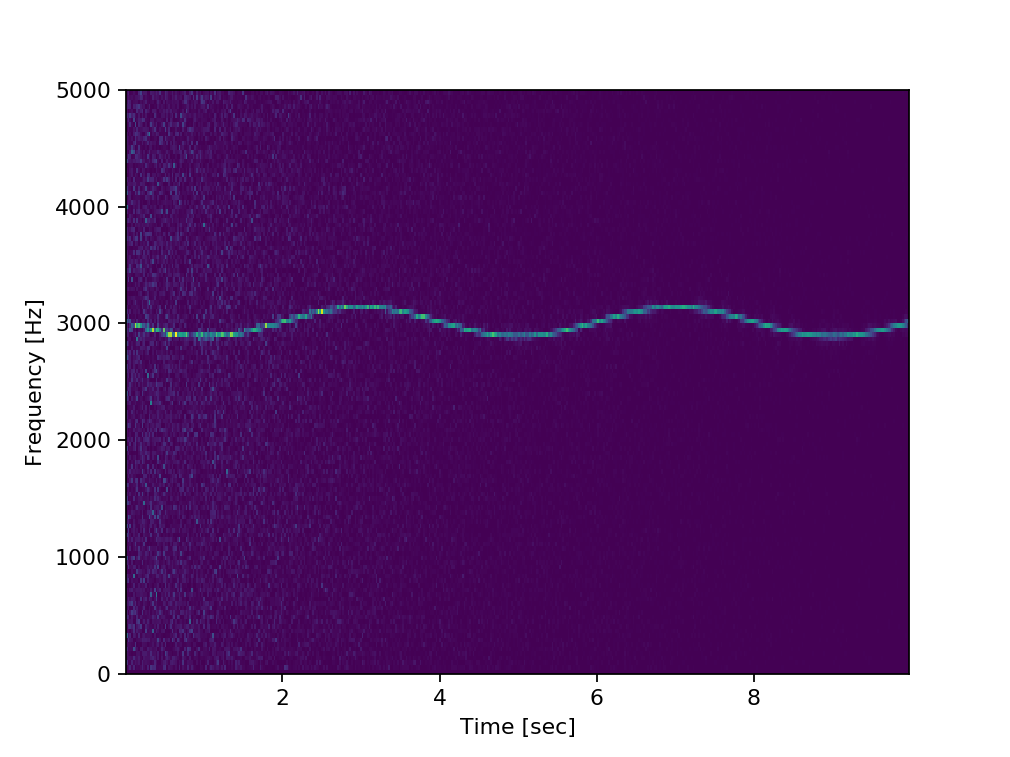

In [23]:
f, t, Sxx = scipy.signal.spectrogram(x, fs,window='boxcar')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [14]:
dirName = 'data/training2017/'
xTrain = np.load(dirName + 'train.npy')
yTrain = np.load(dirName + 'trainlabel.npy')
yTrain=yTrain[:,1]

In [16]:
df=pd.DataFrame(yTrain)

In [20]:
df[0].value_counts()

N    6811
A     988
~     295
Name: 0, dtype: int64

In [19]:
df[0].head()

0    N
1    N
2    N
3    N
4    N
Name: 0, dtype: object

<IPython.core.display.Javascript object>


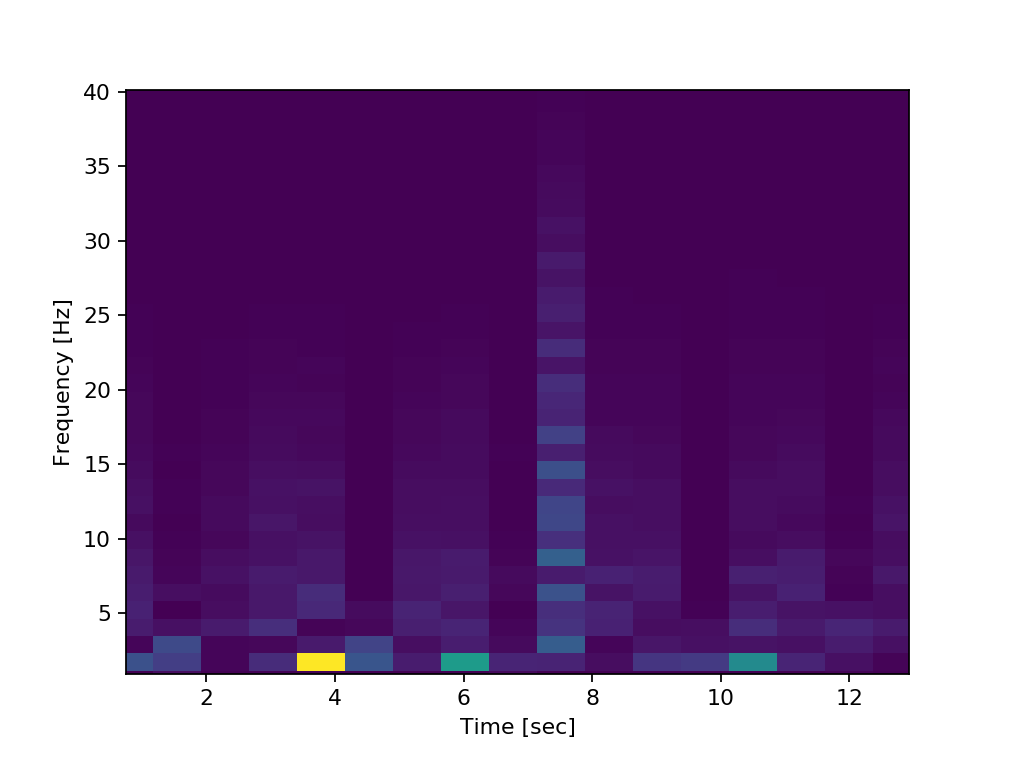

Text(0.5,0,'Time [sec]')

In [24]:
f, t, Sxx = spectrogram(xTrain[0,:], 300)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


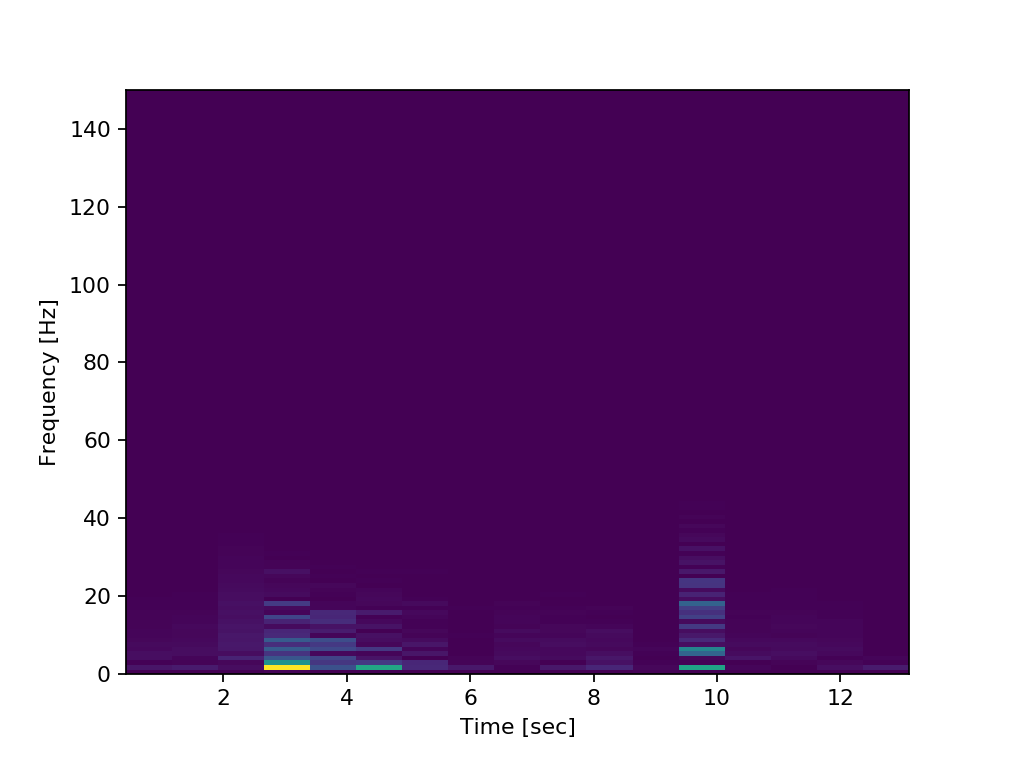

Text(0.5,0,'Time [sec]')

In [25]:
f, t, Sxx = spectrogram(xTrain[1,:], 300)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')